In [2]:
pip install mpi4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 4.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.4-cp38-cp38-linux_x86_64.whl size=4438480 sha256=89d5c020b025905b4f8b572dba34ea70f97be5b88db4e0ba628ed54aa881a080
  Stored in directory: /root/.cache/pip/wheels/f3/35/48/0b9a7076995eea5ea64a7e4bc3f0f342f453080795276264e7
Successfully built mpi4py


In [15]:
! pip3 install ipyparallel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 298 kB 5.5 MB/s 
     |████████████████████████████████| 1.6 MB 53.8 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [65]:
!mpirun --allow-run-as-root -n 4 python task_2.py 67 1500 1500 --periodic --savefig

67 1500 1500 True True
67 1500 1500 True True
67 1500 1500 True True
67 1500 1500 True True
SAVEFIG
0 time elapsed: 2.456950832000075


In [79]:
!mpirun --allow-run-as-root -n 4 python task_2.py 167 1000 1500 --periodic --savefig

167 1500 1000 True True
167 1500 1000 True True
167 1500 1000 True True
167 1500 1000 True True
SAVEFIG
0 time elapsed: 3.516238875000454


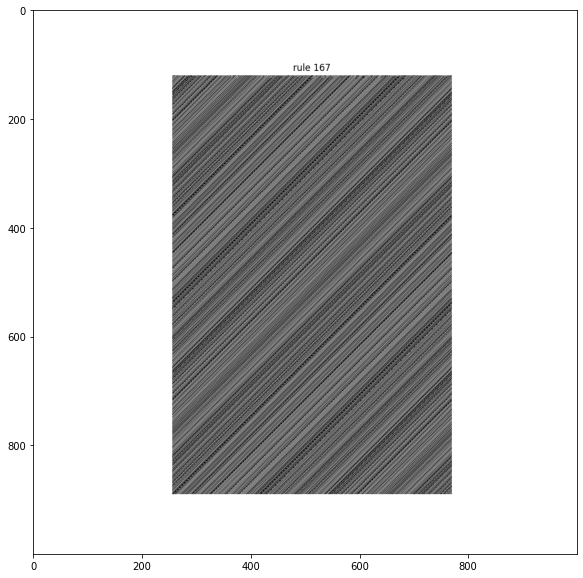

In [86]:
img = mpimg.imread('rule_167_seqsize_1000_steps_1500.png')
plt.figure(figsize=(14, 10))
plt.imshow(img)

## Эволюция для одного правила

In [66]:
!ls

rule_67_seqsize_1500_steps_1000.png  rule_67_seqsize_1500_steps_1500.png
rule_67_seqsize_1500_steps_1100.png  sample_data
rule_67_seqsize_1500_steps_1200.png  task_2.py
rule_67_seqsize_1500_steps_1300.png  task2.py
rule_67_seqsize_1500_steps_1400.png


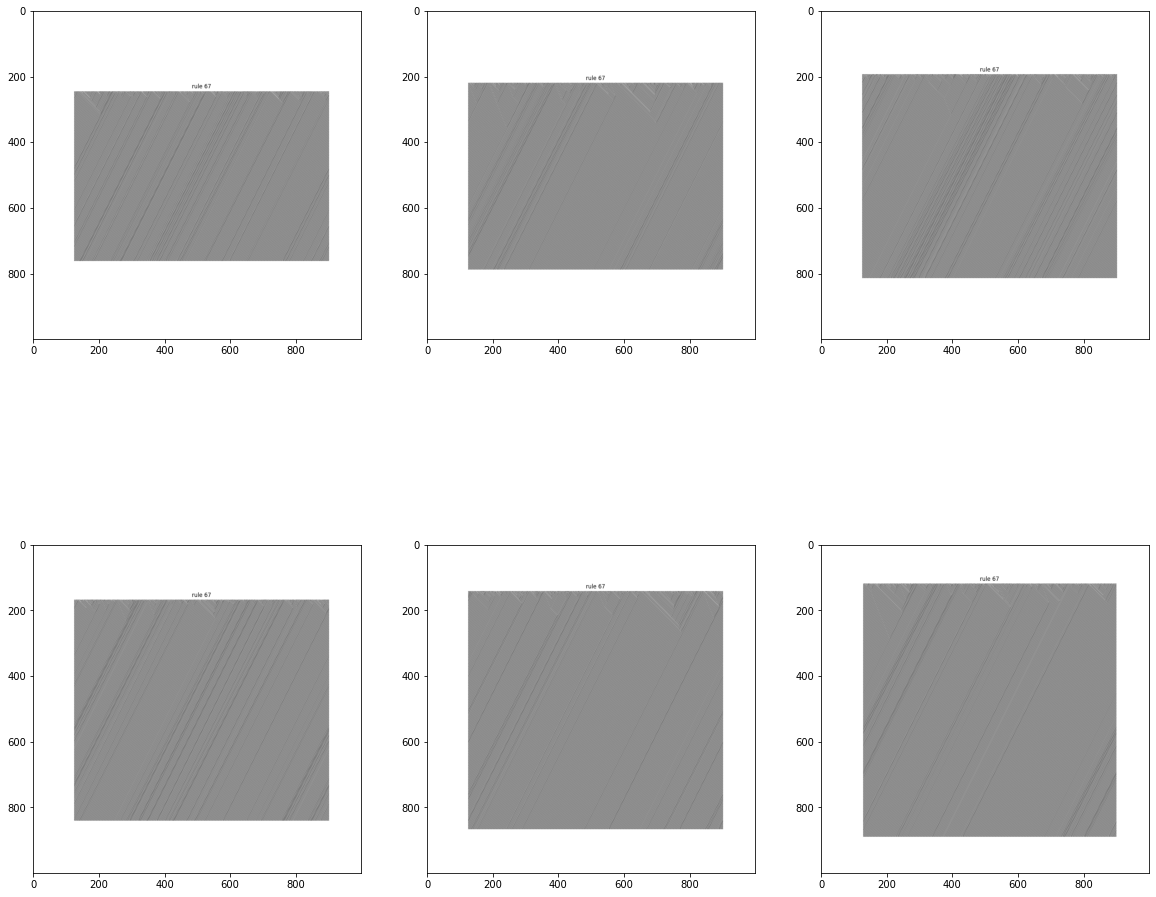

In [87]:
fig, ax = plt.subplots(2, 3, figsize=(20, 18), )
img1 = mpimg.imread('rule_67_seqsize_1500_steps_1000.png')
img2 = mpimg.imread('rule_67_seqsize_1500_steps_1100.png')
img3 = mpimg.imread('rule_67_seqsize_1500_steps_1200.png')
img4 = mpimg.imread('rule_67_seqsize_1500_steps_1300.png')
img5 = mpimg.imread('rule_67_seqsize_1500_steps_1400.png')
img6 = mpimg.imread('rule_67_seqsize_1500_steps_1500.png')

ax[0][0].imshow(img1)
ax[0][1].imshow(img2)
ax[0][2].imshow(img3)
ax[1][0].imshow(img4)
ax[1][1].imshow(img5)
ax[1][2].imshow(img6)

## График "Ускорения" программы

In [130]:
!for i in {2..10}; do mpirun --allow-run-as-root -n $i python task_2.py 123 5000 1500 --periodic; done
!tail -n +1 num_nodes_*_rule_123.txt >results.txt
!rm num_nodes_*_rule_123.txt

0 time elapsed: 1.0564325890009059
0 time elapsed: 1.3722866299995076
0 time elapsed: 2.7495897870012413
0 time elapsed: 3.6908363809998264
0 time elapsed: 3.2831706359993404
0 time elapsed: 5.655947539000408
0 time elapsed: 7.275822430001426
0 time elapsed: 6.37778175999847
0 time elapsed: 8.496104711999578


In [206]:
import pandas as pd

with open('results.txt', 'r') as f:
  text = f.readlines()

text = text[1::2]
text = text[1:] + [text[0]]
_transform = lambda text: list(map(lambda x: x.strip().replace('  ', ' ').split(' ')[-1], text))
transform = lambda text: list(map(lambda x: float(x.split('=')[1]), _transform(text)))

list_time_spent = transform(text)

In [208]:
df = pd.DataFrame(data={'nodes': list(range(2, 11)), 'time': list_time_spent})
df

,nodes,time
0,2,1.056433
1,3,1.372287
2,4,2.749590
3,5,3.690836
4,6,3.283171
5,7,5.655948
6,8,7.275822
7,9,6.377782
8,10,8.496105


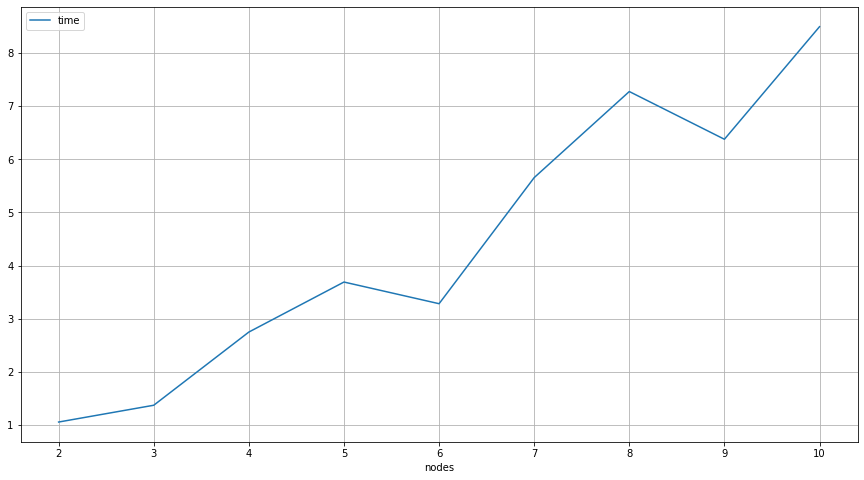

In [209]:
ax = df.plot(x='nodes', y='time', figsize=(15,8))
ax.grid()